## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data impot

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Load the DataFrames from CSV files
df_flight_grounddelay = pd.read_csv('df_flight_imp.csv')  # Load flight data from CSV
# df_ground_grounddelay = pd.read_csv('df_ground_imp.csv')  # Load ground data from CSV, no new information
df_personal_grounddelay = pd.read_csv('df_personal_imp.csv')  # Load personal data from CSV

C:\Users\marti\AppData\Local\Temp\ipykernel_12032\67228562.py:4: DtypeWarning: Columns (66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df_personal_grounddelay = pd.read_csv('df_personal_imp.csv')  # Load personal data from CSV


## 3.1 Correlation analysis

### ground_time_delay

In [4]:
df_flight_grounddelay.head()

,leg_no,fn_number,dep_ap_sched,arr_ap_sched,dep_sched,arr_sched,m_offblockdt,m_onblockdt,departure_delay,arrival_delay,sched_flight_time,act_flight_time,ac_registration,change_reason_code,ac_type_code,trans_time,sched_trans_time,trans_time_delay,crew_group,crew_type_change,sched_ground_time,ground_time_delay,act_ground_time,catering_duration,pax_boarding_duration,flight_time_delay,dep_inbound_weekday,arr_weekday,dep_time_of_day,arr_time_of_day,anzahl_personal
0,272005011,EC3098,North Gregory,East Carmen,2019-06-01 00:40:00,2019-06-01 04:30:00,2019-06-01 00:43:00,2019-06-01 04:12:00,3.0,-18.0,230.0,209.0,ECLBSX,other problem,320,0,0,0,Start,[],235.0,33.0,268.0,NaN,NaN,-21.0,Saturday,Saturday,Night,Night,6
1,272009188,EC3146,Port Bobby,East Carmen,2019-06-01 02:05:00,2019-06-01 04:00:00,2019-06-01 01:58:00,2019-06-01 03:40:00,-7.0,-20.0,115.0,102.0,ECLWHX,no reason,E95,0,0,0,Start,[],130.0,59.0,189.0,NaN,NaN,-13.0,Saturday,Saturday,Night,Night,5
2,271984537,EC2840,Port Ryan,East Carmen,2019-06-01 02:20:00,2019-06-01 03:50:00,2019-06-01 02:24:00,2019-06-01 03:57:00,4.0,7.0,90.0,93.0,ECLGLX,other problem,DH4,0,0,0,Start,[],185.0,11.0,196.0,NaN,NaN,3.0,Saturday,Saturday,Night,Night,4
3,272025831,EC3306,Coleland,East Carmen,2019-06-01 02:25:00,2019-06-01 04:00:00,2019-06-01 02:28:00,2019-06-01 03:49:00,3.0,-11.0,95.0,81.0,ECLBMX,other problem,320,0,0,0,Start,[],145.0,30.0,175.0,NaN,NaN,-14.0,Saturday,Saturday,Night,Night,6
4,272006092,EC3114,East Melissaberg,East Carmen,2019-06-01 02:30:00,2019-06-01 04:15:00,2019-06-01 03:02:00,2019-06-01 04:43:00,32.0,28.0,105.0,101.0,ECLGNX,other problem,DH4,0,0,0,Start,[],35.0,-14.0,21.0,26.0,26.0,-4.0,Saturday,Saturday,Night,Night,4


In [5]:
df_personal_grounddelay.head()

,leg_no,anzahl_personal,person_1_name,person_1_att1,person_1_att2,person_1_att3,person_1_ca,person_1_cp,person_2_name,person_2_att1,person_2_att2,person_2_att3,person_2_ca,person_2_cp,person_3_name,person_3_att1,person_3_att2,person_3_att3,person_3_ca,person_3_cp,person_4_name,person_4_att1,person_4_att2,person_4_att3,person_4_ca,person_4_cp,person_5_name,person_5_att1,person_5_att2,person_5_att3,person_5_ca,person_5_cp,person_6_name,person_6_att1,person_6_att2,person_6_att3,person_6_ca,person_6_cp,person_7_name,person_7_att1,person_7_att2,person_7_att3,person_7_ca,person_7_cp,person_8_name,person_8_att1,person_8_att2,person_8_att3,person_8_ca,person_8_cp,person_9_name,person_9_att1,person_9_att2,person_9_att3,person_9_ca,person_9_cp,crew_group_A,crew_group_B,crew_group_B2,crew_group_C,crew_group_Start,change_person_1,change_person_2,change_person_3,change_person_4,change_person_5,change_person_6,change_person_7,change_person_8,change_person_9
0,272005011,6,Jason Brown,NaN,NaN,NaN,0,1,Jacob Stein,NaN,NaN,NaN,1,0,Cody Brown,NaN,NaN,NaN,0,1,Larry Morales,NaN,NaN,NaN,1,0,Jessica Hendricks,NaN,NaN,NaN,1,0,Brian Moore,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,272009188,5,Scott Baker,NaN,NaN,NaN,0,1,Ruth Hoffman,NaN,NaN,NaN,1,0,Daniel George,NaN,NaN,NaN,1,0,David Moody,NaN,NaN,NaN,0,1,Brian Maxwell,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,271984537,4,Cory Cooper,NaN,NaN,NaN,1,0,Morgan Foster,NaN,NaN,NaN,0,1,James Sandoval,NaN,NaN,NaN,1,0,Brian Lester,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,272025831,6,Anne Davis,NaN,NaN,NaN,1,0,Miss Amanda Harris MD,NaN,NaN,NaN,0,1,Amy Dunn,NaN,NaN,NaN,1,0,Brian Lee,NaN,NaN,NaN,1,0,Kimberly Pratt,NaN,NaN,NaN,1,0,Russell Yang,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,272006092,4,Renee Fisher,NaN,NaN,NaN,1,0,Rebecca Castro,NaN,NaN,NaN,0,1,Robert Yoder,NaN,NaN,NaN,0,1,Todd Young,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(len(df_flight_grounddelay))
print(len(df_personal_grounddelay))

9783
9783


In [7]:
# Merge both dataframes
df_merged_grounddelay = pd.merge(
    df_flight_grounddelay,
    df_personal_grounddelay,
    on='leg_no',  # Common column to merge on
    how='inner'   # Choose the type of merge: 'inner', 'outer', 'left', or 'right'
)

#### Correlation of numerical features

In [8]:
df_merged_grounddelay.head()

,leg_no,fn_number,dep_ap_sched,arr_ap_sched,dep_sched,arr_sched,m_offblockdt,m_onblockdt,departure_delay,arrival_delay,sched_flight_time,act_flight_time,ac_registration,change_reason_code,ac_type_code,trans_time,sched_trans_time,trans_time_delay,crew_group,crew_type_change,sched_ground_time,ground_time_delay,act_ground_time,catering_duration,pax_boarding_duration,flight_time_delay,dep_inbound_weekday,arr_weekday,dep_time_of_day,arr_time_of_day,anzahl_personal_x,anzahl_personal_y,person_1_name,person_1_att1,person_1_att2,person_1_att3,person_1_ca,person_1_cp,person_2_name,person_2_att1,person_2_att2,person_2_att3,person_2_ca,person_2_cp,person_3_name,person_3_att1,person_3_att2,person_3_att3,person_3_ca,person_3_cp,person_4_name,person_4_att1,person_4_att2,person_4_att3,person_4_ca,person_4_cp,person_5_name,person_5_att1,person_5_att2,person_5_att3,person_5_ca,person_5_cp,person_6_name,person_6_att1,person_6_att2,person_6_att3,person_6_ca,person_6_cp,person_7_name,person_7_att1,person_7_att2,person_7_att3,person_7_ca,person_7_cp,person_8_name,person_8_att1,person_8_att2,person_8_att3,person_8_ca,person_8_cp,person_9_name,person_9_att1,person_9_att2,person_9_att3,person_9_ca,person_9_cp,crew_group_A,crew_group_B,crew_group_B2,crew_group_C,crew_group_Start,change_person_1,change_person_2,change_person_3,change_person_4,change_person_5,change_person_6,change_person_7,change_person_8,change_person_9
0,272005011,EC3098,North Gregory,East Carmen,2019-06-01 00:40:00,2019-06-01 04:30:00,2019-06-01 00:43:00,2019-06-01 04:12:00,3.0,-18.0,230.0,209.0,ECLBSX,other problem,320,0,0,0,Start,[],235.0,33.0,268.0,NaN,NaN,-21.0,Saturday,Saturday,Night,Night,6,6,Jason Brown,NaN,NaN,NaN,0,1,Jacob Stein,NaN,NaN,NaN,1,0,Cody Brown,NaN,NaN,NaN,0,1,Larry Morales,NaN,NaN,NaN,1,0,Jessica Hendricks,NaN,NaN,NaN,1,0,Brian Moore,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,272009188,EC3146,Port Bobby,East Carmen,2019-06-01 02:05:00,2019-06-01 04:00:00,2019-06-01 01:58:00,2019-06-01 03:40:00,-7.0,-20.0,115.0,102.0,ECLWHX,no reason,E95,0,0,0,Start,[],130.0,59.0,189.0,NaN,NaN,-13.0,Saturday,Saturday,Night,Night,5,5,Scott Baker,NaN,NaN,NaN,0,1,Ruth Hoffman,NaN,NaN,NaN,1,0,Daniel George,NaN,NaN,NaN,1,0,David Moody,NaN,NaN,NaN,0,1,Brian Maxwell,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,271984537,EC2840,Port Ryan,East Carmen,2019-06-01 02:20:00,2019-06-01 03:50:00,2019-06-01 02:24:00,2019-06-01 03:57:00,4.0,7.0,90.0,93.0,ECLGLX,other problem,DH4,0,0,0,Start,[],185.0,11.0,196.0,NaN,NaN,3.0,Saturday,Saturday,Night,Night,4,4,Cory Cooper,NaN,NaN,NaN,1,0,Morgan Foster,NaN,NaN,NaN,0,1,James Sandoval,NaN,NaN,NaN,1,0,Brian Lester,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,272025831,EC3306,Coleland,East Carmen,2019-06-01 02:25:00,2019-06-01 04:00:00,2019-06-01 02:28:00,2019-06-01 03:49:00,3.0,-11.0,95.0,81.0,ECLBMX,other problem,320,0,0,0,Start,[],145.0,30.0,175.0,NaN,NaN,-14.0,Saturday,Saturday,Night,Night,6,6,Anne Davis,NaN,NaN,NaN,1,0,Miss Amanda Harris MD,NaN,NaN,NaN,0,1,Amy Dunn,NaN,NaN,NaN,1,0,Brian Lee,NaN,NaN,NaN,1,0,Kimberly Pratt,NaN,NaN,NaN,1,0,Russell Yang,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,272006092,EC3114,East Melissaberg,East Carmen,2019-06-01 02:30:00,2019-06-01 04:15:00,2019-06-01 03:02:00,2019-06-01 04:43:00,32.0,28.0,105.0,101.0,ECLGNX,other problem,DH4,0,0,0,Start,[],35.0,-14.0,21.0,26.0,26.0,-4.0,Saturday,Saturday,Night,Night,4,4,Renee Fisher,NaN,NaN,NaN,1,0,Rebecca Castro,NaN,NaN,NaN,0,1,Robert Yoder,NaN,NaN,NaN,0,1,Todd Young,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,

In [9]:
# Drop columns with few data points
df_merged_grounddelay.drop(columns=['person_9_att3', 'person_9_att2', 'person_9_att1', 'person_9_name', 'change_person_9', 'change_person_8', 'change_person_7', 'change_person_6', 'person_8_att3', 'person_8_att2', 'person_8_att1', 'person_8_name', ], inplace=True)

In [10]:
# Drop columns which have information which do not exist at the point of prediction
df_merged_grounddelay.drop(columns=['act_ground_time', 'arrival_delay', 'departure_delay', 'flight_time_delay' ], inplace=True)

In [11]:
# View basic information about the DataFrame
print(df_merged_grounddelay.info())

# View the first few rows
print(df_merged_grounddelay.head())

# Get summary statistics for numeric columns
print(df_merged_grounddelay.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9783 entries, 0 to 9782
Data columns (total 84 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   leg_no                 9783 non-null   int64  
 1   fn_number              9783 non-null   object 
 2   dep_ap_sched           9783 non-null   object 
 3   arr_ap_sched           9783 non-null   object 
 4   dep_sched              9783 non-null   object 
 5   arr_sched              9783 non-null   object 
 6   m_offblockdt           9783 non-null   object 
 7   m_onblockdt            9783 non-null   object 
 8   sched_flight_time      9783 non-null   float64
 9   act_flight_time        9783 non-null   float64
 10  ac_registration        9783 non-null   object 
 11  change_reason_code     9783 non-null   object 
 12  ac_type_code           9783 non-null   object 
 13  trans_time             9783 non-null   int64  
 14  sched_trans_time       9783 non-null   int64  
 15  tran

In [12]:
# Check for missing values
missing_values = df_merged_grounddelay.isnull().sum()
missing_percentage = (missing_values / len(df_merged_grounddelay)) * 100
print(missing_percentage[missing_percentage > 0])  # Show only columns with missing data

catering_duration        26.760707
pax_boarding_duration    33.660431
person_1_att1            44.710212
person_1_att2            44.710212
person_1_att3            44.710212
person_2_att1            43.974241
person_2_att2            43.974241
person_2_att3            43.974241
person_3_name             0.010222
person_3_att1            43.739139
person_3_att2            43.739139
person_3_att3            43.739139
person_4_name             0.010222
person_4_att1            44.311561
person_4_att2            44.311561
person_4_att3            44.311561
person_5_name            22.058673
person_5_att1            57.313707
person_5_att2            57.313707
person_5_att3            57.313707
person_6_name            57.201268
person_6_att1            78.084432
person_6_att2            78.084432
person_6_att3            78.084432
person_7_name            95.563733
person_7_att1            98.006746
person_7_att2            98.006746
person_7_att3            98.006746
change_person_1     

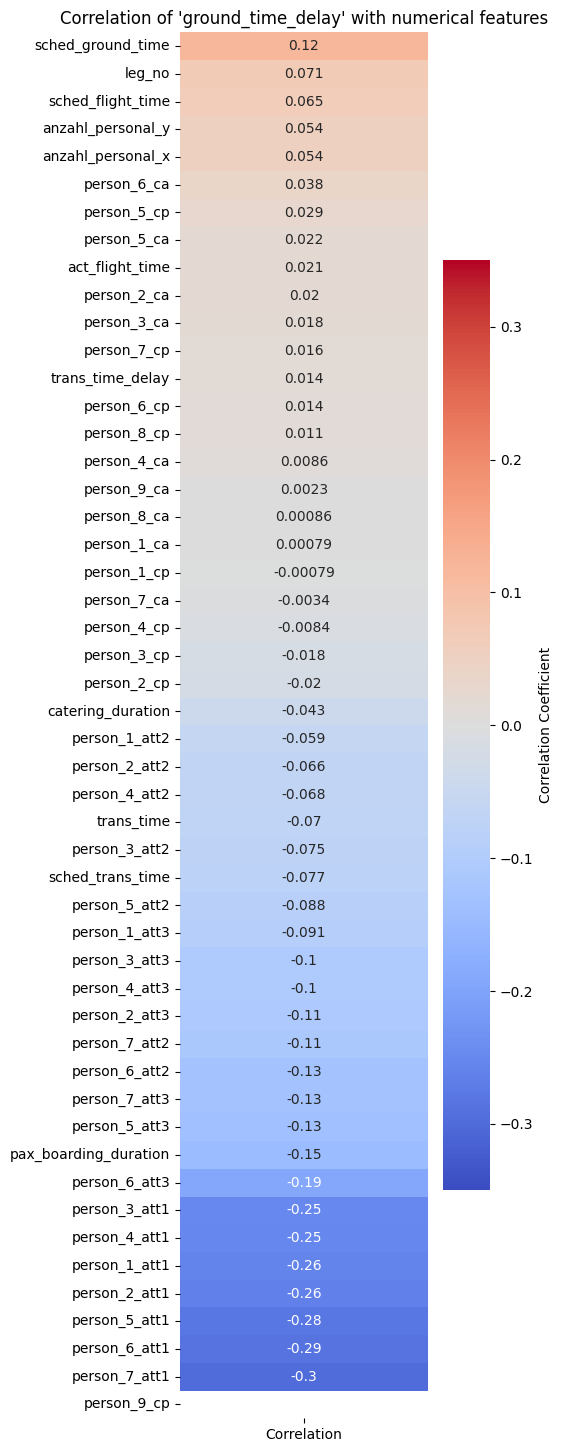

sched_ground_time        0.118561
leg_no                   0.070983
sched_flight_time        0.064980
anzahl_personal_y        0.054469
anzahl_personal_x        0.054469
person_6_ca              0.037637
person_5_cp              0.028739
person_5_ca              0.021758
act_flight_time          0.020936
person_2_ca              0.020220
person_3_ca              0.017878
person_7_cp              0.015887
trans_time_delay         0.014232
person_6_cp              0.013511
person_8_cp              0.011105
person_4_ca              0.008609
person_9_ca              0.002278
person_8_ca              0.000864
person_1_ca              0.000791
person_1_cp             -0.000791
person_7_ca             -0.003408
person_4_cp             -0.008435
person_3_cp             -0.017702
person_2_cp             -0.020220
catering_duration       -0.042557
person_1_att2           -0.058786
person_2_att2           -0.065675
person_4_att2           -0.067737
trans_time              -0.069604
person_3_att2 

In [13]:
# Select only the numerical columns from the DataFrame
numeric_df_merged_grounddelay = df_merged_grounddelay.select_dtypes(include=[float, int])  # Select columns of type float and int

# Calculate the correlation matrix for numerical columns
correlation_matrix = numeric_df_merged_grounddelay.corr()  # Compute pairwise correlation of columns

# Extract correlations with the 'ground_time_delay' column, dropping self-correlation
ground_time_delay_corr = correlation_matrix['ground_time_delay'].drop('ground_time_delay').sort_values(ascending=False)

# Convert the series to a DataFrame for visualization
ground_time_delay_corr_df = ground_time_delay_corr.to_frame(name='Correlation')

# Plot the heatmap of the correlations
plt.figure(figsize=(4, 18))  # Set figure size
sns.heatmap(ground_time_delay_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'ground_time_delay' with numerical features")  # Add title
plt.show()  # Show heatmap

# Display the correlations as a DataFrame
print(ground_time_delay_corr)

#### Correlation of time categories

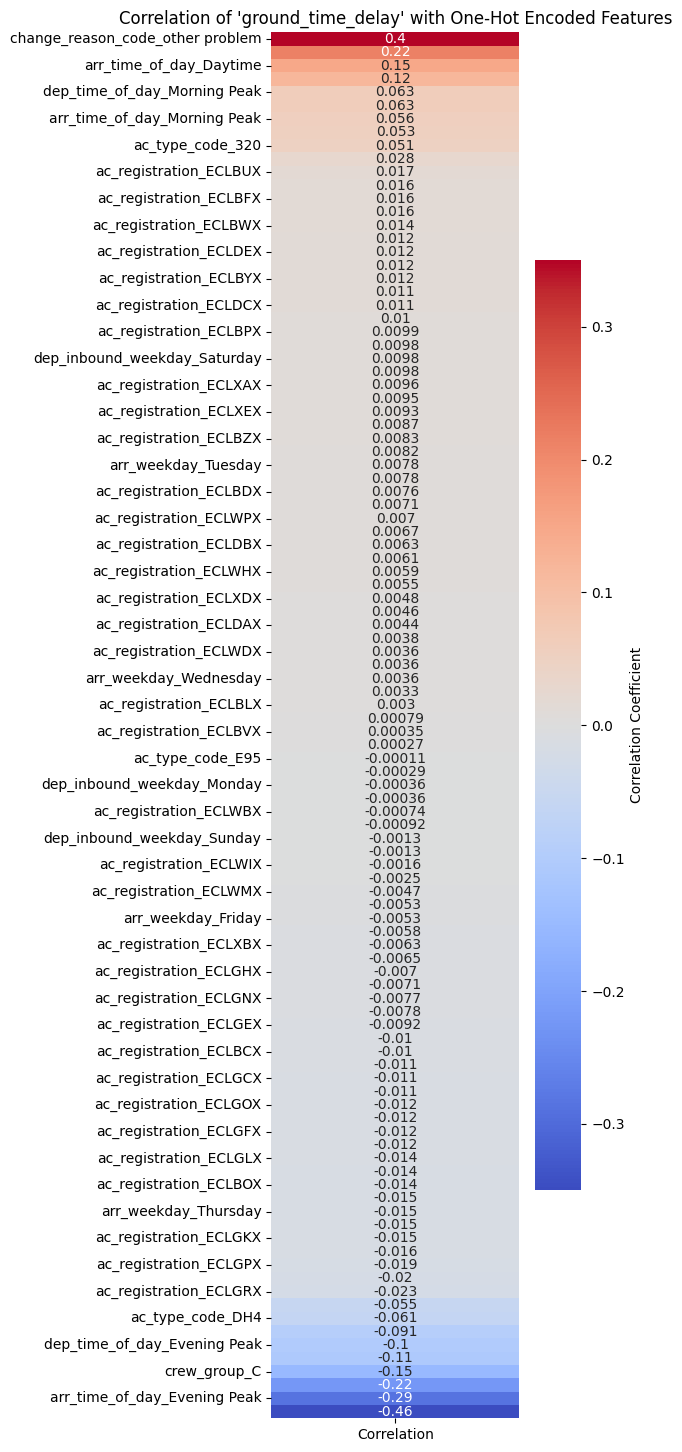

change_reason_code_other problem         0.404784
change_reason_code_no reason             0.215168
arr_time_of_day_Daytime                  0.149484
crew_group_A                             0.119316
dep_time_of_day_Morning Peak             0.062873
                                           ...   
crew_group_B                            -0.106694
crew_group_C                            -0.152191
change_reason_code_rotational problem   -0.222762
arr_time_of_day_Evening Peak            -0.285414
change_reason_code_technical problem    -0.455787
Name: ground_time_delay, Length: 104, dtype: float64


In [14]:
# List of categorical columns to apply One-Hot Encoding
categorical_columns = [
    'dep_time_of_day', 'arr_time_of_day', 'arr_weekday', 'dep_inbound_weekday', 
    'ac_type_code', 'change_reason_code', 'crew_group',
    'ac_registration' #is commented out, you can include it if needed
]

# Apply One-Hot Encoding for each categorical feature
df_encoded = pd.get_dummies(df_merged_grounddelay[categorical_columns], drop_first=False)

# Concatenate the encoded columns with the original 'ground_time_delay'
df_flight_flightdelay_encoded = pd.concat([df_merged_grounddelay['ground_time_delay'], df_encoded], axis=1)

# Calculate the correlation matrix for all numerical and one-hot encoded columns
correlation_matrix = df_flight_flightdelay_encoded.corr()

# Extract correlations with 'ground_time_delay' and drop the self-correlation
ground_time_delay_corr = correlation_matrix['ground_time_delay'].drop('ground_time_delay').sort_values(ascending=False)

# Convert the correlations into a DataFrame for visualization
ground_time_delay_corr_df = ground_time_delay_corr.to_frame(name='Correlation')

# Plot the heatmap for the correlations with 'ground_time_delay'
plt.figure(figsize=(4, 18))
sns.heatmap(ground_time_delay_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'ground_time_delay' with One-Hot Encoded Features")
plt.show()

# Display the correlations in the console
print(ground_time_delay_corr)

#### Correlation of airports

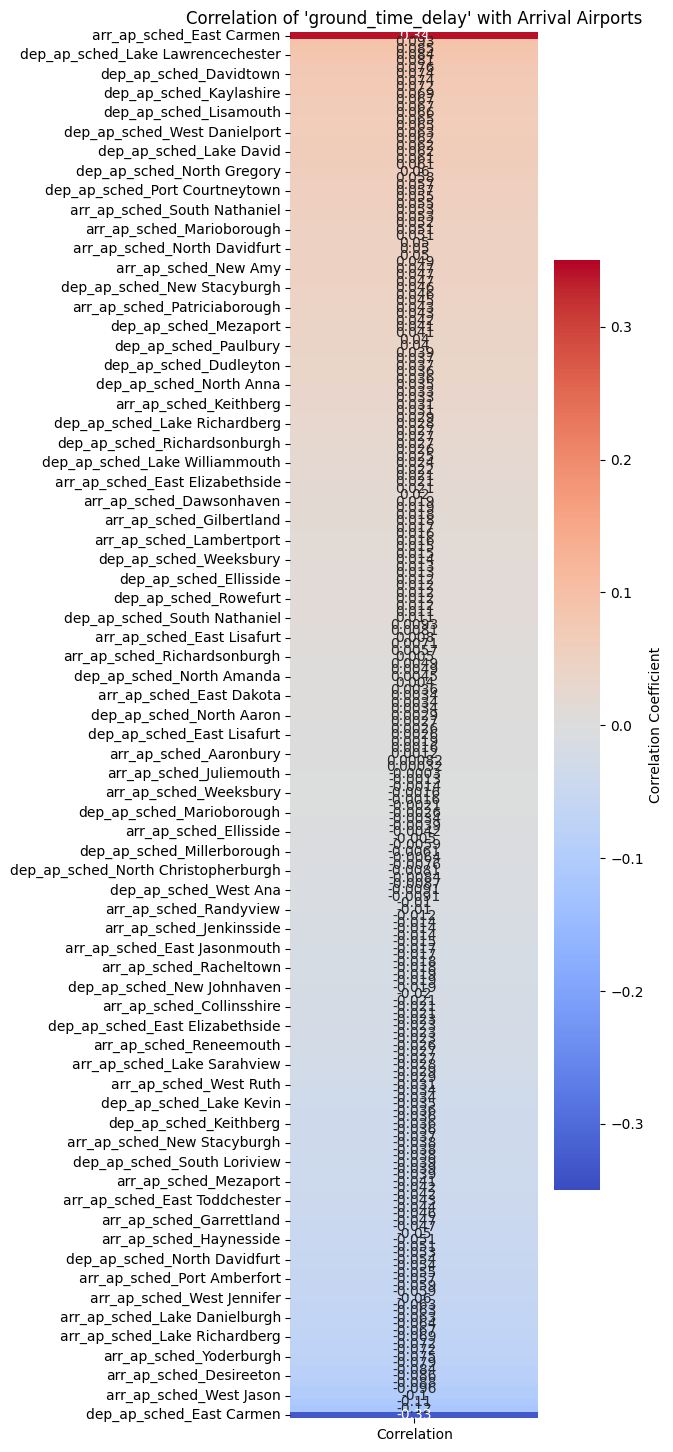

arr_ap_sched_East Carmen             0.341663
dep_ap_sched_Ryanland                0.092737
dep_ap_sched_West Jason              0.085178
dep_ap_sched_Lake Lawrencechester    0.083870
dep_ap_sched_Port Bobby              0.081106
                                       ...   
arr_ap_sched_Lake Lawrencechester   -0.096246
arr_ap_sched_West Jason             -0.100649
arr_ap_sched_West Bryanstad         -0.110804
arr_ap_sched_Youngland              -0.115578
dep_ap_sched_East Carmen            -0.329033
Name: ground_time_delay, Length: 214, dtype: float64


In [15]:
# List of categorical columns to apply One-Hot Encoding
categorical_columns = [
    'dep_ap_sched',  # Optional: You can include this if needed
    'arr_ap_sched',  # Only 'arr_ap_sched' column for One-Hot Encoding
]

# Apply One-Hot Encoding for each categorical feature
df_encoded = pd.get_dummies(df_merged_grounddelay[categorical_columns], drop_first=False)

# Concatenate the encoded columns with the original 'ground_time_delay'
df_flight_flightdelay_encoded = pd.concat([df_merged_grounddelay['ground_time_delay'], df_encoded], axis=1)

# Calculate the correlation matrix for all numerical and one-hot encoded columns
correlation_matrix = df_flight_flightdelay_encoded.corr()

# Extract correlations with 'ground_time_delay' and drop the self-correlation
ground_time_delay_corr = correlation_matrix['ground_time_delay'].drop('ground_time_delay').sort_values(ascending=False)

# Convert the correlations into a DataFrame for visualization
ground_time_delay_corr_df = ground_time_delay_corr.to_frame(name='Correlation')

# Create a heatmap to visualize the correlations
plt.figure(figsize=(4, 18))
sns.heatmap(ground_time_delay_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'ground_time_delay' with Arrival Airports")
plt.show()  # Show the heatmap

# Display the correlations in the console
print(ground_time_delay_corr)

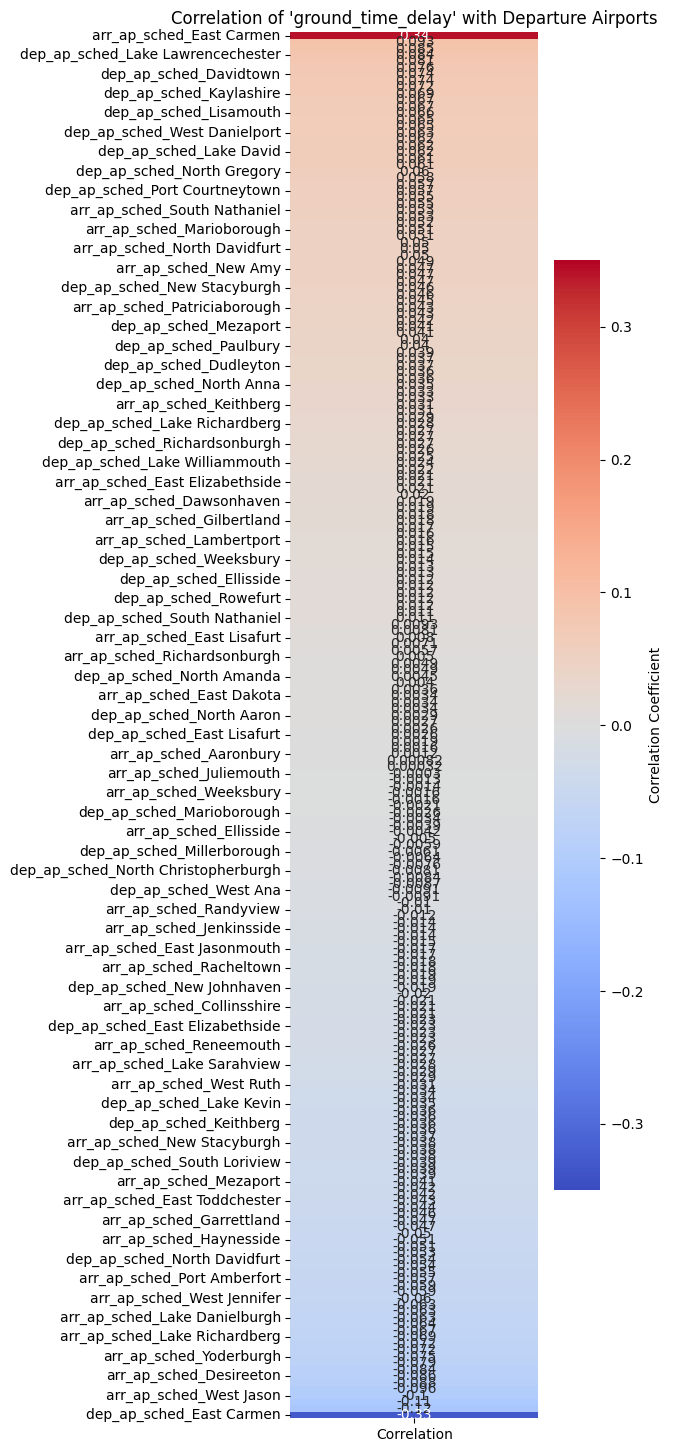

arr_ap_sched_East Carmen             0.341663
dep_ap_sched_Ryanland                0.092737
dep_ap_sched_West Jason              0.085178
dep_ap_sched_Lake Lawrencechester    0.083870
dep_ap_sched_Port Bobby              0.081106
                                       ...   
arr_ap_sched_Lake Lawrencechester   -0.096246
arr_ap_sched_West Jason             -0.100649
arr_ap_sched_West Bryanstad         -0.110804
arr_ap_sched_Youngland              -0.115578
dep_ap_sched_East Carmen            -0.329033
Name: ground_time_delay, Length: 214, dtype: float64


In [16]:
# List of categorical columns to apply One-Hot Encoding
categorical_columns = [
    'dep_ap_sched',  # Optional: You can include this if needed
    'arr_ap_sched',  # Only 'arr_ap_sched' column for One-Hot Encoding
]

# Apply One-Hot Encoding for each categorical feature
df_encoded = pd.get_dummies(df_merged_grounddelay[categorical_columns], drop_first=False)

# Concatenate the encoded columns with the original 'ground_time_delay'
df_flight_flightdelay_encoded = pd.concat([df_merged_grounddelay['ground_time_delay'], df_encoded], axis=1)

# Calculate the correlation matrix for all numerical and one-hot encoded columns
correlation_matrix = df_flight_flightdelay_encoded.corr()

# Extract correlations with 'ground_time_delay' and drop the self-correlation
ground_time_delay_corr = correlation_matrix['ground_time_delay'].drop('ground_time_delay').sort_values(ascending=False)

# Convert the correlations into a DataFrame for visualization
ground_time_delay_corr_df = ground_time_delay_corr.to_frame(name='Correlation')

# Create a heatmap to visualize the correlations
plt.figure(figsize=(4, 18))
sns.heatmap(ground_time_delay_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'ground_time_delay' with Departure Airports")
plt.show()  # Show the heatmap

# Display the correlations in the console
print(ground_time_delay_corr)

#### Selection of data correlation > 0.2

In [17]:
df_merged_grounddelay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9783 entries, 0 to 9782
Data columns (total 84 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   leg_no                 9783 non-null   int64  
 1   fn_number              9783 non-null   object 
 2   dep_ap_sched           9783 non-null   object 
 3   arr_ap_sched           9783 non-null   object 
 4   dep_sched              9783 non-null   object 
 5   arr_sched              9783 non-null   object 
 6   m_offblockdt           9783 non-null   object 
 7   m_onblockdt            9783 non-null   object 
 8   sched_flight_time      9783 non-null   float64
 9   act_flight_time        9783 non-null   float64
 10  ac_registration        9783 non-null   object 
 11  change_reason_code     9783 non-null   object 
 12  ac_type_code           9783 non-null   object 
 13  trans_time             9783 non-null   int64  
 14  sched_trans_time       9783 non-null   int64  
 15  tran

In [18]:
# Drop columns with high cross correlation (known from previous run)
df_merged_grounddelay.drop(columns=['person_3_att1', 'person_4_att1', 'person_7_att1', 'person_2_att1', 'person_5_att1', 'person_6_att1' ], inplace=True)

                                      Correlation
change_reason_code_other problem         0.404784
arr_ap_sched_East Carmen                 0.341663
change_reason_code_no reason             0.215168
crew_type_change_[]                      0.169883
arr_time_of_day_Daytime                  0.149484
...                                           ...
person_1_att1                           -0.258391
arr_time_of_day_Evening Peak            -0.285414
dep_ap_sched_East Carmen                -0.329033
change_reason_code_technical problem    -0.455787
person_9_cp                                   NaN

[962 rows x 1 columns]
                                       Correlation
change_reason_code_other problem          0.404784
arr_ap_sched_East Carmen                  0.341663
change_reason_code_no reason              0.215168
change_reason_code_rotational problem    -0.222762
person_1_att1                            -0.258391
arr_time_of_day_Evening Peak             -0.285414
dep_ap_sched_East C

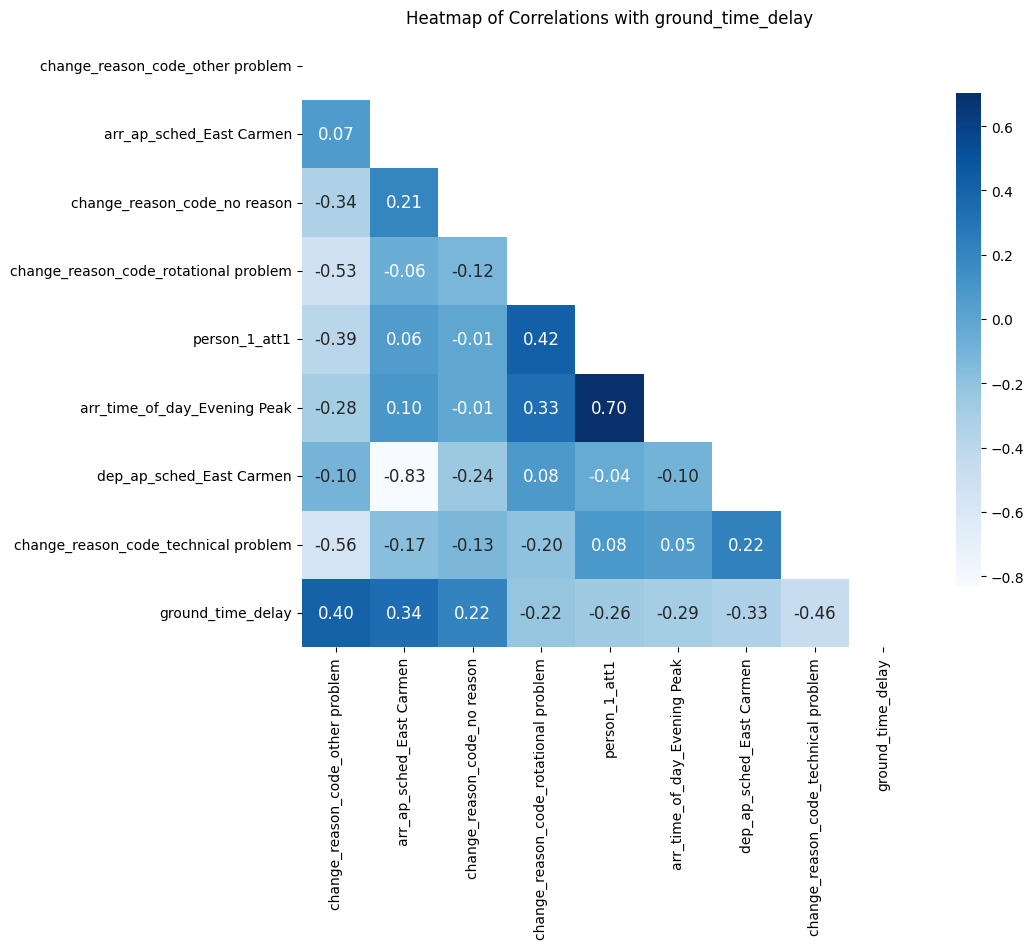

                                       change_reason_code_other problem  \
change_reason_code_other problem                               1.000000   
arr_ap_sched_East Carmen                                       0.068358   
change_reason_code_no reason                                  -0.337371   
change_reason_code_rotational problem                         -0.527094   
person_1_att1                                                 -0.387419   
arr_time_of_day_Evening Peak                                  -0.284732   
dep_ap_sched_East Carmen                                      -0.103745   
change_reason_code_technical problem                          -0.555335   
ground_time_delay                                              0.404784   

                                       arr_ap_sched_East Carmen  \
change_reason_code_other problem                       0.068358   
arr_ap_sched_East Carmen                               1.000000   
change_reason_code_no reason                    

In [19]:
# Define categorical columns for One-Hot Encoding
categorical_columns = [
    'fn_number', 'dep_ap_sched', 'arr_ap_sched', 'ac_registration',
    'change_reason_code', 'ac_type_code', 'crew_group', 'crew_type_change',
    'dep_inbound_weekday', 'arr_weekday', 'dep_time_of_day', 'arr_time_of_day',
    'change_person_1', 'change_person_2', 'change_person_3', 'change_person_4', 'change_person_5',
    'crew_group_A', 'crew_group_B', 'crew_group_B2', 'crew_group_C', 'crew_group_Start'
]

# Select only the numerical columns from the DataFrame
numeric_df_flight_flightdelay = df_merged_grounddelay.select_dtypes(include=[float, int])  # Select numeric columns

# Apply One-Hot Encoding to categorical features
df_encoded = pd.get_dummies(df_merged_grounddelay[categorical_columns], drop_first=False)  # One-hot encode categorical columns

# Combine the numerical and one-hot encoded columns into a single DataFrame
df_combined = pd.concat([numeric_df_flight_flightdelay, df_encoded], axis=1)  # Combine both DataFrames

# Calculate the correlation matrix for all features in the DataFrame
correlation_matrix = df_combined.corr()  # Compute pairwise correlation
ground_time_delay_corr = correlation_matrix['ground_time_delay'].drop('ground_time_delay').sort_values(ascending=False)  # Extract correlations with 'ground_time_delay'

# Convert the correlations into a DataFrame for easier visualization
ground_time_delay_corr_df = ground_time_delay_corr.to_frame(name='Correlation')

# Display the full list of correlations
print(ground_time_delay_corr_df)

# Filter correlations to keep only those with an absolute value above 0.15
filtered_corr_df = ground_time_delay_corr_df[ground_time_delay_corr_df['Correlation'].abs() > 0.2]  # Filter by absolute correlation threshold

# Display the filtered correlations
print(filtered_corr_df)

# Calculate the correlation matrix for the relevant features (those with high correlation)
features_of_interest = filtered_corr_df.index.tolist()  # Get the features with high correlation

# Add 'ground_time_delay' to the list of features
features_of_interest.append('ground_time_delay')  # Add the target variable to the list

# Create a filtered correlation matrix that includes only the relevant features
filtered_correlation_matrix = correlation_matrix.loc[features_of_interest, features_of_interest]  # Subset the correlation matrix

# Create and display the heatmap for the filtered correlation matrix
mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='Blues', mask=mask, square=True, cbar_kws={"shrink": .8})  # Plot the heatmap
plt.title('Heatmap of Correlations with ground_time_delay')
plt.show()  # Show the plot

# Save the filtered correlation matrix to a CSV file for further analysis
filtered_correlation_matrix.to_csv('filtered_correlation_matrix.csv')  # Save the matrix to CSV

# Print the filtered correlation matrix to the console
print(filtered_correlation_matrix)

In [ ]:
# Select only the important features based on filtered correlations
important_features = filtered_corr_df.index.tolist()

# List of features to be removed because of too high cross corelation
# features_to_remove = ['person_3_att1', 'person_4_att1', 'person_5_att1', 'person_2_att1'] # already done before
# features_to_remove = [] # no features to be removed
features_to_remove = ['crew_group_C', 'crew_group_C', 'crew_group_C'] # already done before



# Remove the specified features from the list
for feature in features_to_remove:
    if feature in important_features:
        important_features.remove(feature)

# Display the updated list to verify
print(important_features)

df_ground_delay_prediction_data = df_combined[important_features + ['ground_time_delay']]
df_ground_delay_prediction_data.head()

### Ground_time_delay

### Safe Datasets

In [42]:
# Save the filtered dataset
df_ground_delay_prediction_data.to_csv("df_ground_delay_prediction_data_short.csv", index=False)